<a href="https://colab.research.google.com/github/joaodpcm/MDA/blob/preprocessing_data_david/classifier_model_mda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages


In [1]:
# Import libraries
!pip install pandas-profiling
!pip install ydata-profiling
!pip install geopy
!pip install autoviz
!pip install matplotlib
!pip install -U textblob
!pip install statsmodels
!pip install missingno
!python -m textblob.download_corpora
!pip install missingpy
!pip install scikit-learn
!pip install sklearn
import numpy as np 
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import os
import sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 41.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=648b2987c736bab55d955c11078b772ef03af243736331

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 8.2 MB/s eta 0:00:00
  Created wheel for emoj

# Clone repository

In [2]:
#Accessing GitHub repository
!git clone <https://github.com/joaodpcm/MDAgit>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `git clone <https://github.com/joaodpcm/MDAgit>'


In [53]:
# Setting package for drive
!pip install pyDrive
from google.colab import files
# Set path to the directory containing the meta dataset
path_copy_meteo = "path"
df_meteo = pd.read_csv(path_copy_meteo)
path_copy_noise = "path"
df_noise = pd.read_excel(path_copy_noise)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Consistency

In [54]:
df_noise = df_noise.rename(columns={"startTime": "DATEUTC", "comp": "target"})

In [55]:
df = df_meteo.merge(df_noise, how='inner', on='DATEUTC')

In [56]:
df['DATEUTC'] = pd.to_datetime(df['DATEUTC'])

In [57]:
df['nameday'] = df['DATEUTC'].dt.dayofweek

In [58]:
df['hour'] = df['DATEUTC'].dt.hour

In [59]:
df = df.rename(columns={'LC_WINDSPEED': "wind", 'LC_TEMP_QCL3': 'temp','LC_RAININ':'rain','LC_HUMIDITY':'humidity'})

In [60]:
df = df.dropna(subset=['target'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8754 entries, 0 to 8762
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATEUTC       8754 non-null   datetime64[ns]
 1   temp          8754 non-null   float64       
 2   humidity      8754 non-null   float64       
 3   wind          8754 non-null   float64       
 4   rain          8754 non-null   float64       
 5   LC_DAILYRAIN  8754 non-null   float64       
 6   id            522 non-null    float64       
 7   title         522 non-null    object        
 8   endTime       522 non-null    object        
 9   url           483 non-null    object        
 10  tags          473 non-null    object        
 11  address       362 non-null    object        
 12  name          475 non-null    object        
 13  latitude      162 non-null    float64       
 14  longitude     162 non-null    float64       
 15  noise_level   8754 non-null   float64 


# Splitting data


In [62]:
# Extracting correct features
from sklearn.model_selection import train_test_split
x = df[['temp', 'nameday', 'hour', 'humidity', 'rain', 'wind', 'event_yes']]
  
y = df['target']

# # Extracting correct features
# from sklearn.model_selection import train_test_split
# x = df[['LC_TEMP_QCL3', 'LC_HUMIDITY', 'LC_WINDSPEED', 'LC_RAININ',
#        'LC_DAILYRAIN', 'nameday']]
  
# y = df['target']\

# Splitting data into train data and validation data 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

## Random Forest

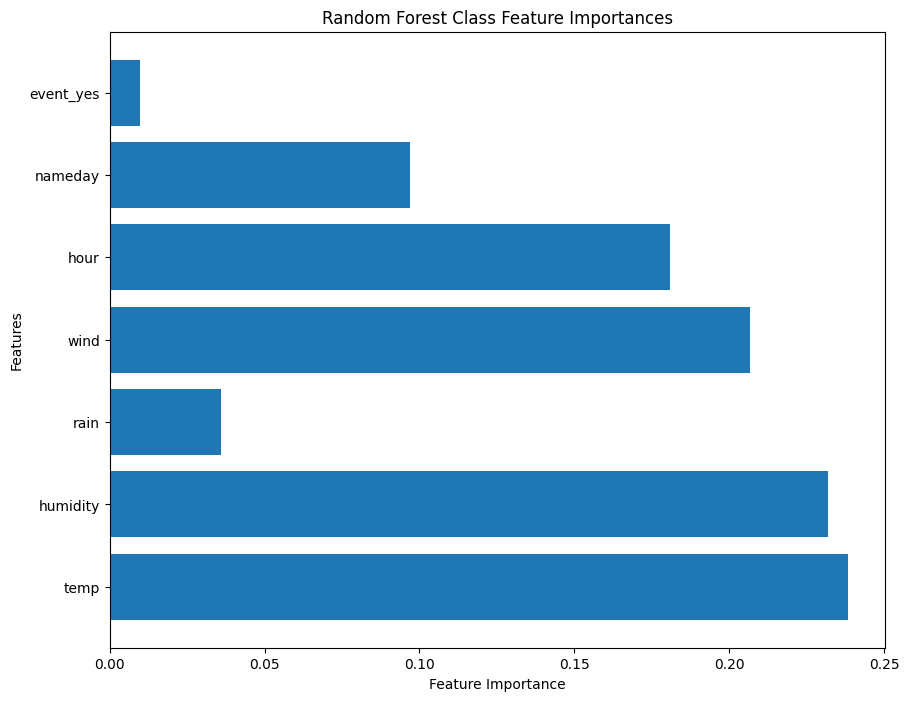

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.exceptions import NotFittedError
from sklearn.inspection import permutation_importance


# Define numeric and categorical features
numeric_features = ['temp', 'humidity', 'rain', 'wind']
categorical_features = ['hour', 'nameday', 'event_yes']

if 'target' in numeric_features:
    numeric_features.remove('target')

# Define transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline with preprocessor and random forest regressor
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestClassifier(n_estimators=300, random_state=42))
])

# Fit the pipeline on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rfc = rfc.predict(X_test)

# Fit the OneHotEncoder transformer to the categorical features
categorical_transformer.fit(X_train[categorical_features])

# Get feature importances and names
importances = rfc.named_steps['regressor'].feature_importances_
encoded_cat_features = categorical_transformer.named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(encoded_cat_features)
feature_importances = np.zeros(len(all_feature_names))

# Add the importances of the original numeric features
feature_importances[:len(numeric_features)] += importances[:len(numeric_features)]

# Combine the importances of the encoded categorical features into the original features
feature_importances = importances[:len(numeric_features)].tolist()  # Start with the numeric features
for i, feature_name in enumerate(categorical_features):
    encoded_cat_importances = [
        importances[j] for j, feat_name in enumerate(all_feature_names)
        if feat_name.startswith(feature_name + '_')
    ]
    feature_importances.append(sum(encoded_cat_importances))

# Get the names of the original features
original_feature_names = numeric_features + categorical_features

# Plot the feature importances
plt.figure(figsize=(10,8))
plt.barh(original_feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Class Feature Importances')
plt.show()

In [64]:
from sklearn.metrics import classification_report

# Generate predictions on the test set
y_pred_rfc = rfc.predict(X_test)

# Create a classification report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

        High       0.48      0.11      0.17       303
Intermediate       0.73      0.96      0.83      1557
         Low       0.48      0.10      0.16       329

    accuracy                           0.71      2189
   macro avg       0.57      0.39      0.39      2189
weighted avg       0.66      0.71      0.64      2189



# Trial on realtime data



In [67]:
# df = pd.read_csv("routes.csv")
os.chdir("/content/drive/MyDrive/modern_data_analysis")

In [68]:
!pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
from datetime import timedelta
content = "https://weather.com/weather/hourbyhour/l/c097b546627cdff2da1e276cb9b2731055718a5e7270d777a92857a9701c7870"
response = requests.get(content)
soup = BeautifulSoup(response.content, 'html.parser')

temp_val = soup.findAll('div', attrs={'class':'DetailsTable--field--CPpc_'})


forecast = pd.DataFrame()
forecast['temp'] = [round((int(temp_val[i].text[-3:-1])-32 ) *5/9, 1) for i in list(np.array(range(288))) if i%6 == 0]
forecast['wind'] = [float(temp_val[i].text.split(' ')[1]) for i in list(np.array(range(288))) if i%6 == 1]
forecast['wind_direction'] = [temp_val[i].text.split(' ')[0] for i in list(np.array(range(288))) if i%6 == 1]
forecast['humidity'] = [int(temp_val[i].text[-3:-1]) for i in list(np.array(range(288))) if i%6 == 2]
forecast['cloud_cover'] = [int(temp_val[i].text.replace('Cloud Cover', '')[:-1]) for i in list(np.array(range(288))) if i%6 == 4]
forecast['rain'] = [int(temp_val[i].text.replace('Rain Amount', '').replace(' in', '')) for i in list(np.array(range(288))) if i%6 == 5]
weekday = [(datetime.now()+timedelta(hours=i)).weekday() for i in range(48)]
hour_of_day = [(datetime.now()+timedelta(hours=i)).hour for i in range(48)]
forecast['nameday'] = weekday
forecast['hour'] = hour_of_day
forecast['event_yes'] = '' # This value has to be included by the user. So edit this. The value now is missing, but the model running, so even if nothing is provided, it will run
forecast['tag_category'] = '' # This value has to be included by the user. So edit this


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
# Generate predictions on the test set
prediction_app = rfc.predict(forecast)

In [71]:
prediction_app

array(['Intermediate', 'Intermediate', 'Intermediate', 'Intermediate',
       'Intermediate', 'Intermediate', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'Intermediate', 'Intermediate', 'Intermediate',
       'Intermediate', 'Intermediate', 'Intermediate', 'Intermediate',
       'Intermediate', 'Intermediate', 'High', 'High', 'High',
       'Intermediate', 'High', 'High', 'High', 'High', 'High',
       'Intermediate', 'High', 'High', 'High', 'Intermediate', 'High',
       'Intermediate', 'Intermediate', 'Intermediate', 'Intermediate'],
      dtype=object)